In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Food_Truck.csv',header=None)
df.columns=['x','y']
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
x=df['x']
y=df['y']

In [3]:
n=x.count()
y_sum = 0
x_sum = 0 
x2 = 0
y2 = 0
xy = 0
for i in range(n):
    x_sum += x[i]
    y_sum += y[i]
    x2 += (x[i]**2)
    y2 += (y[i]**2)
    xy += x[i]*y[i]
    
x_mean  = x_sum/n;
y_mean = y_sum/n;
dev_x = 0
dev_y = 0
for i in range(n):
    dev_x += ((x[i]-x_mean)**2)
    dev_y += ((y[i]-y_mean)**2)
x_std = (dev_x/n-1)**(1/2)
y_std = (dev_y/n-1)**(1/2)
print(x_std,y_std,x_mean,y_mean)

3.7177421618587077 5.389802371582251 8.159800000000002 5.83913505154639


In [4]:
m = ((n*xy-x_sum*y_sum)/(n*x2-x_sum**2))
c = (y_sum-m*x_sum)/n
r = m*x_std/y_std

In [5]:
print(m,r,c)

1.1930336441895992 0.8229228409014081 -3.895780878311906


In [6]:
y_pred = []
for num in x:
    y_pred.append((m*num) + c)
df['y1']=y_pred
df.head()

,x,y,y1
0,6.1101,17.5920,3.393774
1,5.5277,9.1302,2.698951
2,8.5186,13.6620,6.267196
3,7.0032,11.8540,4.459272
4,5.8598,6.8233,3.095158


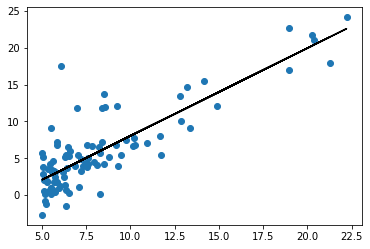

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pred,color='black')
plt.show()

In [8]:
SSE = 0
SST = 0
SSR = 0
for i in range(n):
    SST += ((y[i] - y_mean)**2)
    SSE += ((y[i]-y_pred[i])**2)
    SSR += ((y_pred[i]-y_mean)**2)
cost = SSE/n
R2 = 1-(SSE/SST)
print("SST: {}\nSSE: {}\nSSR: {}\nCost: {}\nR2: {}".format(SST,SSE,SSR,cost,R2))

SST: 2914.8470516572247
SSE: 868.5324469391849
SSR: 2046.3146047180592
Cost: 8.95394275195036
R2: 0.7020315537841397
